In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [2]:
accidents_persona= pd.read_csv("/Users/dannaciendua/Documents/CodeOp/group_project/dataset_gruopp/2023translated_content_accidents_persones.csv")

### Check the table, what I need and what I dont need, understand the information I have

In [3]:
accidents_persona

Case_Number  District_Code   District_Name  Neighborhood_Code  \
0     2023S000001                  3  Sants-Montjuïc                 18   
1     2023S000003                  1    Ciutat Vella                  1   
2     2023S000005                  6          Gràcia                 31   
3     2023S000006                  6          Gràcia                 31   
4     2023S000007                  3  Sants-Montjuïc                 12   
...               ...            ...             ...                ...   
8771  2023S007739                  6          Gràcia                 32   
8772  2023S007740                  4       Les Corts                 20   
8773  2023S007740                  4       Les Corts                 20   
8774  2023S007741                  4       Les Corts                 20   
8775  2023S007742                  4       Les Corts                 20   

                       Neighborhood_Name  Street_Code  \
0                                  Sants        30602   
1                               el Raval        67307   
2                      la Vila de Gràcia       282401   
3                      la Vila de Gràcia       206403   
4             la Marina del Prat Vermell          180   
...                                  ...          ...   
8771  el Camp d'en Grassot i Gràcia Nova       297001   
8772          la Maternitat i Sant Ramon       144601   
8773          la Maternitat i Sant Ramon       144601   
8774          la Maternitat i Sant Ramon       244209   
8775          la Maternitat i Sant Ramon       701434   

                                            Street_Name Postal_Code  \
0                                                 Badal   0186 0186   
1                                                 Carme   0075 0079   
2     Riera de Sant Miquel / Sèneca                 ...   0017 0017   
3     Gran de Gràcia / Gràcia                       ...   0072 0072   
4     Ramon Albó                                    ...   0093 0093   
...                                                 ...         ...   
8771                           Sant Antoni Maria Claret   0045 0045   
8772                                           Diagonal   0687 0687   
8773                                           Diagonal   0687 0687   
8774                                         Joan XXIII   0017 0017   
8775                                   Mig (Descendent)   000220000   

     Day_of_Week  Year  ...  Age Person_Type_Description  \
0         Sunday  2023  ...   57              Pedestrian   
1         Sunday  2023  ...   45              Pedestrian   
2         Sunday  2023  ...   45                  Driver   
3         Sunday  2023  ...   49                  Driver   
4         Sunday  2023  ...   27                  Driver   
...          ...   ...  ...  ...                     ...   
8771      Friday  2023  ...   30                  Driver   
8772    Saturday  2023  ...   57                  Driver   
8773    Saturday  2023  ...   72                  Driver   
8774      Friday  2023  ...   32                  Driver   
8775      Friday  2023  ...   40                  Driver   

               Pedestrian_Accident_Location_Description  \
0     En zona peatonal                              ...   
1     Fora del pas                                  ...   
2     Desconegut                                    ...   
3     Desconegut                                    ...   
4     Desconegut                                    ...   
...                                                 ...   
8771                                            Unknown   
8772                                            Unknown   
8773                                            Unknown   
8774                                            Unknown   
8775                                            Unknown   

     Pedestrian_Movement_Reason_Description  \
0                                   Unknown   
1                                   Unknown   


### Create dictionary with trasnlations catalan to english 

In [4]:
# Load your dataset
file_path = "/Users/dannaciendua/Documents/CodeOp/group_project/dataset_gruopp/2023translated_content_accidents_persones.csv" 
accidents_persona = pd.read_csv(file_path)

# Define translations
translation_dict = {
    "Conductor": "Driver", 'Vianant': 'Pedestrian', 'Passatger': 'Passenger', 'En pas regulat per semŕfor': 'In crossing regulated by traffic lights',
    'En pas sense regular ': 'In unregulated crossing', 'Fora del pas': 'Outside the crossing', 
    "A la vorera / Andana":"On the sidewalk", "En zona peatonal":'In pedestrian area',
    "En pas sense senyalitzar":"At an unmarked crossing",
    "Altres":"Others",
    "Dilluns": "Monday", "Dimarts": "Tuesday", "Dimecres": "Wednesday",
    "Dijous": "Thursday", "Divendres": "Friday", "Dissabte": "Saturday", "Diumenge": "Sunday",
    "Gener": "January", "Febrer": "February", "Març": "March", "Abril": "April",
    "Maig": "May", "Juny": "June", "Juliol": "July", "Agost": "August",
    "Setembre": "September", "Octubre": "October", "Novembre": "November", "Desembre": "December",
    "Il.lčs": "Uninjured", 
    "Ferit lleu: Hospitalització fins a 24h": "Minor injury: Hospitalization up to 24 hours",
    "Ferit lleu: Amb assistčncia sanitŕria en lloc d'accident": "Minor injury: Medical assistance at accident site",
    "Ferit lleu: Rebutja assistčncia sanitŕria": "Minor injury: Refused medical assistance",
    "Ferit greu: hospitalització superior a 24h": "Serious injury: Hospitalization over 24 hours",
    "Mort (dins 24h posteriors accident)": "Death (within 24 hours of accident)",
    "Mort (després de 24h posteriors accident)": "Death (after 24 hours of accident)",
    "Es desconeix": "Unknown", "Desconegut": "Unknown", "Altres": "Others", 
    "Taxi": "Taxi", "Turisme": "Car", "Motocicleta": "Motorcycle",     'Fora del pas': 'Outside the crossing',
    'Desconegut': 'Unknown',
    'A la vorera / Andana': 'On the sidewalk',
    'En pas sense regular': 'In unregulated crossing',
    'En pas regulat per semàfor': 'In crossing regulated by traffic lights',
    'Altres': 'Others',
    'En pas sense senyalitzar': 'At an unmarked crossing',  "Ferit lleu: Amb assistència sanitària en lloc d'accident": "Minor injury: Medical assistance at accident site",
    "Death (within 24 hours of accident)": "Death (within 24 hours of accident)",
    "Ferit lleu: Rebutja assistència sanitària": "Minor injury: Refused medical assistance",
    "Mort natural": "Natural death", 'Dona' : 'Women', 'Home' : 'Men','En zona peatonal': 'In pedestrian area',
    'Fora del pas': 'Outside the crossing',
    'Desconegut': 'Unknown',
    'A la vorera / Andana': 'On the sidewalk',
    'En pas sense regular': 'In unregulated crossing',
    'En pas regulat per semàfor': 'In crossing regulated by traffic lights',
    'Altres': 'Others',
    'En pas sense senyalitzar': 'At an unmarked crossing', 
    'En zona peatonal': 'In pedestrian area',
    'Fora del pas': 'Outside the crossing',
    'Desconegut': 'Unknown',
    'A la vorera / Andana': 'On the sidewalk',
    'En pas sense regular': 'In unregulated crossing',
    'En pas regulat per semàfor': 'In crossing regulated by traffic lights',
    'Altres': 'Others',
    'En pas sense senyalitzar': 'At an unmarked crossing', 
    'Desconegut' : 'Unknown', 'Fora del pas': 'Outside the crossing', "Oci i entreteniment": "Leisure and entertainment",
    "Altres activitats": "Other activities",
    "In itinere": "Commuting",
    "En missió": "On a mission",
    "Estudiant cap a centre d'estudis": "Student heading to an educational center",
    "In itínere": "Commuting",
    "Servei de neteja, recollida d'escombraries": "Cleaning service, garbage collection",
    "Servei de manteniment viari": "Road maintenance service", "No és causa del  vianant": "Not caused by the pedestrian",
    "Desobeir el senyal del semàfor": "Disobeying the traffic light signal",
    "Creuar per fora pas de vianants": "Crossing outside the pedestrian crossing",
    "Others": "Others",
    "Transitar a peu per la calçada": "Walking on the road",
    "Desobeir altres senyals": "Disobeying other signals", "No és causa del  vianant": "Not caused by the pedestrian",
    "Desobeir el senyal del semàfor": "Disobeying the traffic light signal",
    "Creuar per fora pas de vianants": "Crossing outside the pedestrian crossing",
    "Others": "Others",
    "Transitar a peu per la calçada": "Walking on the road",
    "Desobeir altres senyals": "Disobeying other signals"
    
    
    

}

# Apply the translations
accidents_persona.replace(translation_dict, inplace=True)



In [5]:
accidents_persona

Case_Number  District_Code   District_Name  Neighborhood_Code  \
0     2023S000001                  3  Sants-Montjuïc                 18   
1     2023S000003                  1    Ciutat Vella                  1   
2     2023S000005                  6          Gràcia                 31   
3     2023S000006                  6          Gràcia                 31   
4     2023S000007                  3  Sants-Montjuïc                 12   
...               ...            ...             ...                ...   
8771  2023S007739                  6          Gràcia                 32   
8772  2023S007740                  4       Les Corts                 20   
8773  2023S007740                  4       Les Corts                 20   
8774  2023S007741                  4       Les Corts                 20   
8775  2023S007742                  4       Les Corts                 20   

                       Neighborhood_Name  Street_Code  \
0                                  Sants        30602   
1                               el Raval        67307   
2                      la Vila de Gràcia       282401   
3                      la Vila de Gràcia       206403   
4             la Marina del Prat Vermell          180   
...                                  ...          ...   
8771  el Camp d'en Grassot i Gràcia Nova       297001   
8772          la Maternitat i Sant Ramon       144601   
8773          la Maternitat i Sant Ramon       144601   
8774          la Maternitat i Sant Ramon       244209   
8775          la Maternitat i Sant Ramon       701434   

                                            Street_Name Postal_Code  \
0                                                 Badal   0186 0186   
1                                                 Carme   0075 0079   
2     Riera de Sant Miquel / Sèneca                 ...   0017 0017   
3     Gran de Gràcia / Gràcia                       ...   0072 0072   
4     Ramon Albó                                    ...   0093 0093   
...                                                 ...         ...   
8771                           Sant Antoni Maria Claret   0045 0045   
8772                                           Diagonal   0687 0687   
8773                                           Diagonal   0687 0687   
8774                                         Joan XXIII   0017 0017   
8775                                   Mig (Descendent)   000220000   

     Day_of_Week  Year  ...  Age Person_Type_Description  \
0         Sunday  2023  ...   57              Pedestrian   
1         Sunday  2023  ...   45              Pedestrian   
2         Sunday  2023  ...   45                  Driver   
3         Sunday  2023  ...   49                  Driver   
4         Sunday  2023  ...   27                  Driver   
...          ...   ...  ...  ...                     ...   
8771      Friday  2023  ...   30                  Driver   
8772    Saturday  2023  ...   57                  Driver   
8773    Saturday  2023  ...   72                  Driver   
8774      Friday  2023  ...   32                  Driver   
8775      Friday  2023  ...   40                  Driver   

               Pedestrian_Accident_Location_Description  \
0     En zona peatonal                              ...   
1     Fora del pas                                  ...   
2     Desconegut                                    ...   
3     Desconegut                                    ...   
4     Desconegut                                    ...   
...                                                 ...   
8771                                            Unknown   
8772                                            Unknown   
8773                                            Unknown   
8774                                            Unknown   
8775                                            Unknown   

     Pedestrian_Movement_Reason_Description  \
0                                   Unknown   
1                                   Unknown   


In [6]:
for idx, row in accidents_persona.iterrows():
    value = row["Pedestrian_Accident_Location_Description"]
    if value in translation_dict:
        accidents_persona.loc[idx, "Pedestrian_Accident_Location_Description"] = translation_dict[value]

### Remove spaces for Pedestrian_Accident_Location_Description, Involved_Vehicle_Type

In [7]:
accidents_persona['Pedestrian_Accident_Location_Description'] = (
    accidents_persona['Pedestrian_Accident_Location_Description']
    .str.strip()  
)

In [8]:
accidents_persona['Involved_Vehicle_Type'] = (
    accidents_persona['Involved_Vehicle_Type']
    .str.strip()  
)

### Check for unique values in Pedestrian_Accident_Location_Description and add them to the dictionary 

In [9]:
accidents_persona['Pedestrian_Accident_Location_Description'].unique()

array(['En zona peatonal', 'Fora del pas', 'Desconegut',
       'A la vorera / Andana', 'En pas sense regular',
       'En pas regulat per semàfor', 'Altres', 'En pas sense senyalitzar',
       'Unknown'], dtype=object)

In [10]:
accidents_persona['Pedestrian_Cause_Description'].unique()

array(['Not caused by the pedestrian',
       'Crossing outside the pedestrian crossing', 'Others',
       'Disobeying the traffic light signal', 'Walking on the road',
       'Disobeying other signals'], dtype=object)

### Make sure if is an object, and int or a float 

In [11]:
print(accidents_persona.dtypes)
numeric_columns = ['Age', 'UTM_X_Coordinate', 'UTM_Y_Coordinate', 'Longitude', 'Latitude']
for col in numeric_columns:
    for df in [accidents_persona]:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')  

Case_Number                                  object
District_Code                                 int64
District_Name                                object
Neighborhood_Code                             int64
Neighborhood_Name                            object
Street_Code                                   int64
Street_Name                                  object
Postal_Code                                  object
Day_of_Week                                  object
Year                                          int64
Month_Code                                    int64
Month_Name                                   object
Day_of_Month                                  int64
Shift_Description                            object
Hour_of_Day                                   int64
Pedestrian_Cause_Description                 object
Involved_Vehicle_Type                        object
Gender_Description                           object
Age                                          object
Person_Type_

### Age is a object so I need to change it to int to be able to use it for visualizations delete non numeric rows 

In [49]:
accidents_persona = accidents_persona[pd.to_numeric(accidents_persona['Age'], errors='coerce').notnull()]
accidents_persona['Age'] = accidents_persona['Age'].fillna(0).astype(int)


### Check for drivers younger than 16 and count them and drop those rows to have more exact data

In [13]:

incorrect_values = accidents_persona[
    (accidents_persona['Age'] < 16) & (accidents_persona['Person_Type_Description'] == 'Driver')

]
accidents_persona = accidents_persona.drop(incorrect_values.index)



### Drop columns that are not necessary 

In [51]:
columns_to_drop = ['District_Code', 'Neighborhood_Code', 'Street_Code', 'Postal_Code']
columns_existing = [col 
                    for col in 
                    columns_to_drop 
                    if col 
                    in accidents_persona.columns]
accidents_persona = accidents_persona.drop(columns=columns_existing, inplace=False)

print(accidents_persona.head())

       Case_Number   District_Name           Neighborhood_Name  \
0  2023S000001      Sants-Montjuïc                       Sants   
1  2023S000003        Ciutat Vella                    el Raval   
2  2023S000005              Gràcia           la Vila de Gràcia   
3  2023S000006              Gràcia           la Vila de Gràcia   
4  2023S000007      Sants-Montjuïc  la Marina del Prat Vermell   

                                         Street_Name Day_of_Week  Year  \
0                                              Badal      Sunday  2023   
1                                              Carme      Sunday  2023   
2  Riera de Sant Miquel / Sèneca                 ...      Sunday  2023   
3  Gran de Gràcia / Gràcia                       ...      Sunday  2023   
4  Ramon Albó                                    ...      Sunday  2023   

   Month_Code Month_Name  Day_of_Month Shift_Description  ...  \
0           1    January             1           Morning  ...   
1           1    January    

### Datetime column

In [15]:
accidents_persona['datetime'] = pd.to_datetime({
    'year': accidents_persona['Year'],
    'month': accidents_persona['Month_Code'],
    'day': accidents_persona['Day_of_Month']
}) + pd.to_timedelta(accidents_persona['Hour_of_Day'], unit='h')

print(accidents_persona[['datetime']].head())

             datetime
0 2023-01-01 10:00:00
1 2023-01-01 03:00:00
2 2023-01-01 17:00:00
3 2023-01-01 17:00:00
4 2023-01-01 18:00:00


### Drop columns that are not necessary 

In [16]:
accidents_persona.head()

Case_Number   District_Name           Neighborhood_Name  \
0  2023S000001      Sants-Montjuïc                       Sants   
1  2023S000003        Ciutat Vella                    el Raval   
2  2023S000005              Gràcia           la Vila de Gràcia   
3  2023S000006              Gràcia           la Vila de Gràcia   
4  2023S000007      Sants-Montjuïc  la Marina del Prat Vermell   

                                         Street_Name Day_of_Week  Year  \
0                                              Badal      Sunday  2023   
1                                              Carme      Sunday  2023   
2  Riera de Sant Miquel / Sèneca                 ...      Sunday  2023   
3  Gran de Gràcia / Gràcia                       ...      Sunday  2023   
4  Ramon Albó                                    ...      Sunday  2023   

   Month_Code Month_Name  Day_of_Month Shift_Description  ...  \
0           1    January             1           Morning  ...   
1           1    January             1             Night  ...   
2           1    January             1         Afternoon  ...   
3           1    January             1         Afternoon  ...   
4           1    January             1         Afternoon  ...   

   Person_Type_Description Pedestrian_Accident_Location_Description  \
0               Pedestrian                         En zona peatonal   
1               Pedestrian                             Fora del pas   
2                   Driver                               Desconegut   
3                   Driver                               Desconegut   
4                   Driver                               Desconegut   

  Pedestrian_Movement_Reason_Description Driver_Movement_Reason_Description  \
0                                Unknown                            Unknown   
1                                Unknown                            Unknown   
2                                Unknown                            Unknown   
3                                Unknown                            Unknown   
4                                Unknown                            Unknown   

                           Victimization_Description UTM_X_Coordinate  \
0      Serious injury: Hospitalization over 24 hours        427409.24   
1       Minor injury: Hospitalization up to 24 hours        430479.42   
2       Minor injury: Hospitalization up to 24 hours        429637.20   
3  Minor injury: Medical assistance at accident site        429497.51   
4       Minor injury: Hospitalization up to 24 hours        431331.37   

  UTM_Y_Coordinate Longitude   Latitude            datetime  
0       4580907.46  2.130813  41.374565 2023-01-01 10:00:00  
1       4581533.30  2.167452  41.380473 2023-01-01 03:00:00  
2       4583426.13  2.157161  41.397448 2023-01-01 17:00:00  
3       4583693.13  2.155459  41.399841 2023-01-01 17:00:00  
4       4586678.86  2.177056  41.426891 2023-01-01 18:00:00  

[5 rows x 25 columns]

### Check for values in the columns for weird and repeated values

In [17]:
accidents_persona['Victimization_Description'].unique()

array(['Serious injury: Hospitalization over 24 hours',
       'Minor injury: Hospitalization up to 24 hours',
       'Minor injury: Medical assistance at accident site',
       'Death (within 24 hours of accident)',
       'Minor injury: Refused medical assistance', 'Natural death',
       '424812.18 ', '430208.68 ', '430973.7  ', '432719.9  ',
       '427459.19 ', '431870.03 ', '429836.05 ', '431293.95 ',
       '431553.57 ', '431648.46 ', '425819.55 ', '431842.11 ',
       '433012.43 ', '429606.16 ', '429924.38 ', '427961.38 ',
       '430497.04 ', '429667.81 ', '434743.24 ', '430464.89 ',
       '425387.6  ', '426661.83 ', '427133.55 '], dtype=object)

In [18]:
accidents_persona.head()

Case_Number   District_Name           Neighborhood_Name  \
0  2023S000001      Sants-Montjuïc                       Sants   
1  2023S000003        Ciutat Vella                    el Raval   
2  2023S000005              Gràcia           la Vila de Gràcia   
3  2023S000006              Gràcia           la Vila de Gràcia   
4  2023S000007      Sants-Montjuïc  la Marina del Prat Vermell   

                                         Street_Name Day_of_Week  Year  \
0                                              Badal      Sunday  2023   
1                                              Carme      Sunday  2023   
2  Riera de Sant Miquel / Sèneca                 ...      Sunday  2023   
3  Gran de Gràcia / Gràcia                       ...      Sunday  2023   
4  Ramon Albó                                    ...      Sunday  2023   

   Month_Code Month_Name  Day_of_Month Shift_Description  ...  \
0           1    January             1           Morning  ...   
1           1    January             1             Night  ...   
2           1    January             1         Afternoon  ...   
3           1    January             1         Afternoon  ...   
4           1    January             1         Afternoon  ...   

   Person_Type_Description Pedestrian_Accident_Location_Description  \
0               Pedestrian                         En zona peatonal   
1               Pedestrian                             Fora del pas   
2                   Driver                               Desconegut   
3                   Driver                               Desconegut   
4                   Driver                               Desconegut   

  Pedestrian_Movement_Reason_Description Driver_Movement_Reason_Description  \
0                                Unknown                            Unknown   
1                                Unknown                            Unknown   
2                                Unknown                            Unknown   
3                                Unknown                            Unknown   
4                                Unknown                            Unknown   

                           Victimization_Description UTM_X_Coordinate  \
0      Serious injury: Hospitalization over 24 hours        427409.24   
1       Minor injury: Hospitalization up to 24 hours        430479.42   
2       Minor injury: Hospitalization up to 24 hours        429637.20   
3  Minor injury: Medical assistance at accident site        429497.51   
4       Minor injury: Hospitalization up to 24 hours        431331.37   

  UTM_Y_Coordinate Longitude   Latitude            datetime  
0       4580907.46  2.130813  41.374565 2023-01-01 10:00:00  
1       4581533.30  2.167452  41.380473 2023-01-01 03:00:00  
2       4583426.13  2.157161  41.397448 2023-01-01 17:00:00  
3       4583693.13  2.155459  41.399841 2023-01-01 17:00:00  
4       4586678.86  2.177056  41.426891 2023-01-01 18:00:00  

[5 rows x 25 columns]

In [19]:
unique_values = accidents_persona['Pedestrian_Movement_Reason_Description'].value_counts()

print(unique_values)

Pedestrian_Movement_Reason_Description
Unknown                                     8421
Leisure and entertainment                    191
Commuting                                     43
Other activities                              42
On a mission                                  27
Student heading to an educational center      12
Cleaning service, garbage collection           2
Road maintenance service                       1
Taxi                                           1
Name: count, dtype: int64


In [20]:
unique_values = accidents_persona['Victimization_Description'].value_counts()

print(unique_values)

Victimization_Description
Minor injury: Hospitalization up to 24 hours         5859
Minor injury: Medical assistance at accident site    1912
Minor injury: Refused medical assistance              694
Serious injury: Hospitalization over 24 hours         227
Death (within 24 hours of accident)                    20
430464.89                                               2
431648.46                                               2
430973.7                                                2
425387.6                                                2
433012.43                                               1
434743.24                                               1
429667.81                                               1
430497.04                                               1
427961.38                                               1
429924.38                                               1
426661.83                                               1
429606.16                                     

In [21]:
unique_values = accidents_persona['Pedestrian_Cause_Description'].value_counts()

print(unique_values)

Pedestrian_Cause_Description
Not caused by the pedestrian                8135
Disobeying the traffic light signal          248
Crossing outside the pedestrian crossing     193
Others                                        95
Walking on the road                           60
Disobeying other signals                       9
Name: count, dtype: int64


In [22]:
unique_values = accidents_persona['Shift_Description'].value_counts()

print(unique_values)

Shift_Description
Afternoon    4589
Morning      3184
Night         967
Name: count, dtype: int64


In [23]:
unique_values = accidents_persona['Involved_Vehicle_Type'].value_counts()

print(unique_values)

Involved_Vehicle_Type
Motorcycle                             4128
Car                                    1727
Veh. mobilitat personal amb motor       712
Bicicleta                               632
Bus                                     452
Ciclomotor                              370
Furgoneta                               220
Autobús articulat                       173
Taxi                                    160
Camió rígid > 3,5 tones                  27
Camió rígid <= 3,5 tones                 27
Tren o tramvia                           18
Altres vehicles amb motor                16
Tot terreny                              16
Ambulància                               16
Veh. mobilitat personal sense motor      13
Tricicle                                  9
Unknown                                   6
Maquinària d'obres i serveis              6
Autocaravana                              5
Tractor camió                             2
Quadricicle < 75 cc                       2
Quadricicl

### Drop duplicates in case_number

In [24]:
accidents_persona = accidents_persona.drop_duplicates(subset='Case_Number', keep='first')


In [74]:
accidents_persona['Hour_of_Day'] = accidents_persona['Hour_of_Day'].apply(lambda x: x if isinstance(x, str) and ':' in x else None)

In [75]:
accidents_persona['Hour_of_Day'] = accidents_persona['Hour_of_Day'].apply(lambda x: f"{int(x):02}:00:00" if pd.notnull(x) and str(x).isdigit() else x)

In [69]:
accidents_persona['Case_Number'].value_counts()

Case_Number
2023S000001        1
2023S005151        1
2023S005148        1
2023S005147        1
2023S005146        1
                  ..
2023S002582        1
2023S002581        1
2023S002580        1
2023S002579        1
2023S007742        1
Name: count, Length: 6844, dtype: int64

### Age to int

In [70]:
accidents_persona['Age'] = accidents_persona['Age'].astype('Int64') 

In [71]:
accidents_persona['Age'] = pd.to_numeric(accidents_persona['Age'], errors='coerce')
accidents_persona_cleaned = accidents_persona.dropna(subset=['Age'])

In [79]:
print(accidents_persona['Hour_of_Day'])


0       None
1       None
2       None
3       None
4       None
        ... 
8769    None
8770    None
8772    None
8774    None
8775    None
Name: Hour_of_Day, Length: 6844, dtype: object


In [ ]:
#

In [32]:
numeric_columns = ['UTM_X_Coordinate', 'UTM_Y_Coordinate']
for col in numeric_columns:
   
    if accidents_persona[col].dtype == 'object':
        accidents_persona[col] = accidents_persona[col].str.replace(',', '.').astype(float)

In [33]:
accidents_persona.to_csv("/Users/dannaciendua/Documents/CodeOp/group_project/dataset_gruopp/2023_accidents_persona_cleaned.csv", index=False)

# VISUAL

# Accident Frequency by Day of the Week

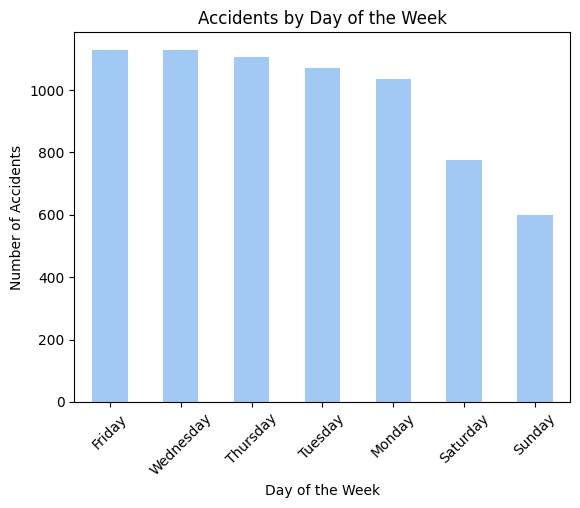

In [34]:
accidents_per_day = accidents_persona['Day_of_Week'].value_counts()
accidents_per_day = accidents_per_day.sort_values(ascending=False)
sns.set_palette("pastel")
accidents_per_day.plot(kind='bar')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

 # Accidents by District

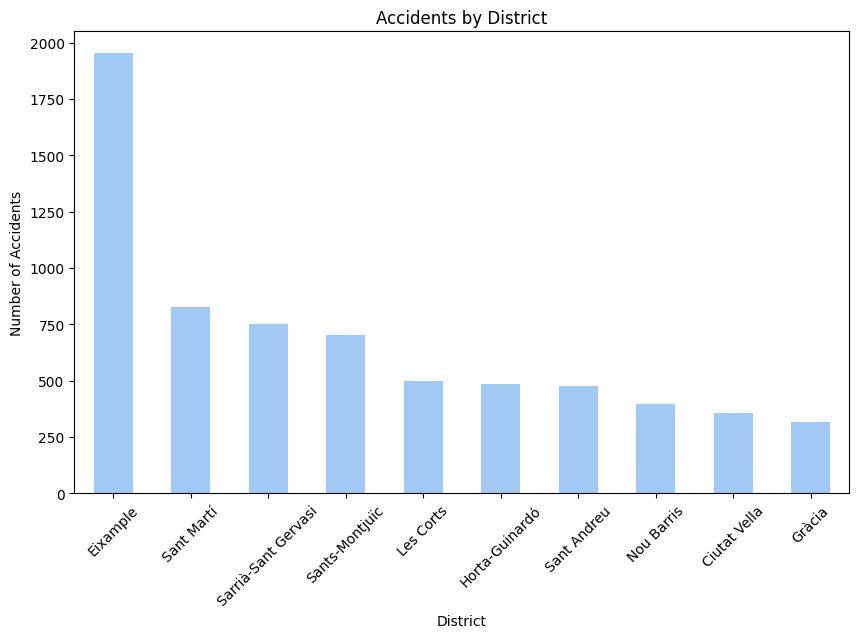

In [35]:

accidents_by_district = accidents_persona[accidents_persona['District_Name'] != 'Unknown']['District_Name'].value_counts()
accidents_by_district.plot(kind='bar', figsize=(10, 6))
sns.set_palette("pastel")
plt.title('Accidents by District')
plt.xlabel('District')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

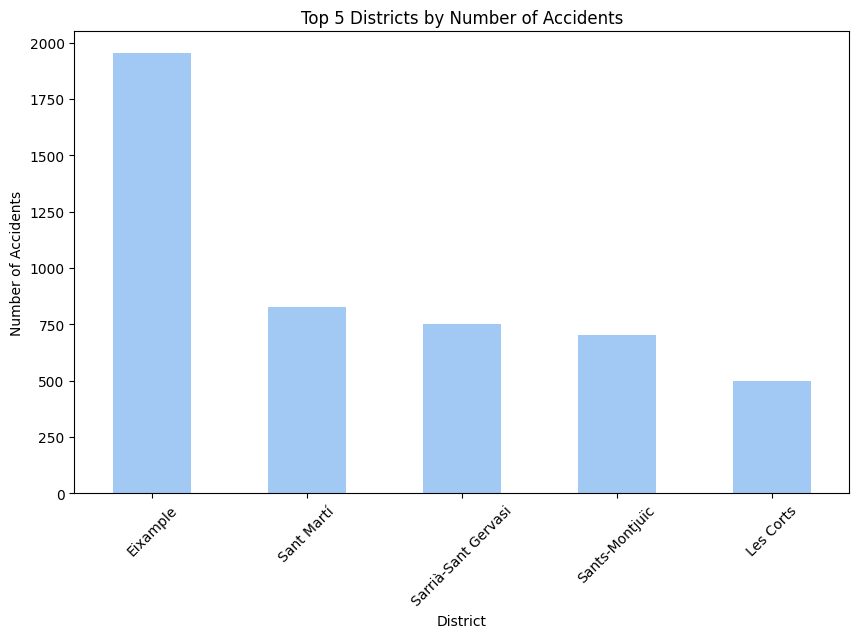

In [36]:

accidents_by_district = accidents_persona[accidents_persona['District_Name'] != 'Unknown']['District_Name'].value_counts()
top_5_districts = accidents_by_district.head(5)
sns.set_palette("pastel")
top_5_districts.plot(kind='bar', figsize=(10, 6))
plt.title('Top 5 Districts by Number of Accidents')
plt.xlabel('District')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


In [37]:
import folium
from folium.plugins import MarkerCluster
sns.set_palette("pastel")

top_5_district_names = top_5_districts.index.tolist()
filtered_data = accidents_persona[
    (accidents_persona['District_Name'].isin(top_5_district_names)) &
    (accidents_persona['Latitude'].notnull()) & 
    (accidents_persona['Longitude'].notnull())
]

map_center = [filtered_data['Latitude'].mean(), filtered_data['Longitude'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=12)
marker_cluster = MarkerCluster().add_to(accident_map)
for _, row in filtered_data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"District: {row['District_Name']}\nAccident ID: {row['Case_Number']}",
    ).add_to(marker_cluster)
accident_map  

# Accidents by Hour of Day

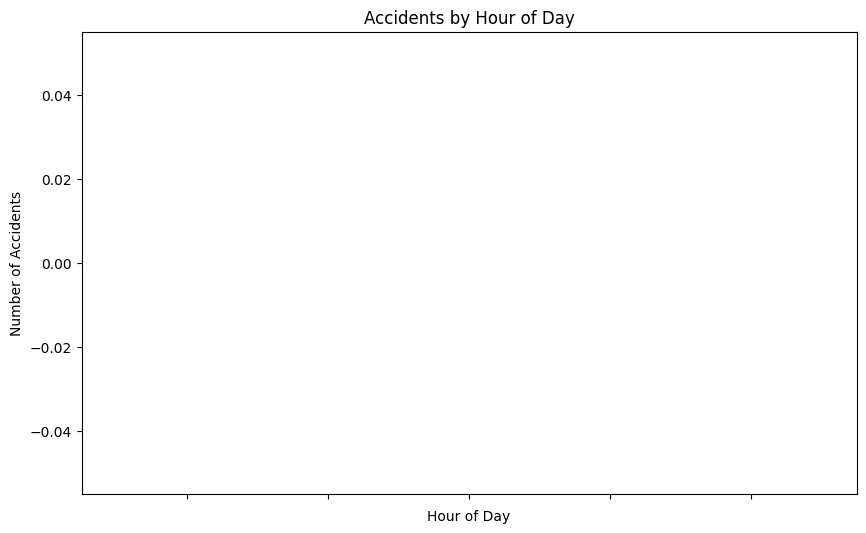

In [67]:

accidents_by_hour = accidents_persona['Hour_of_Day'].value_counts().sort_index()
sns.set_palette("pastel")
accidents_by_hour.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

/var/folders/2b/p_02_vw56dz2qcq7yt8y1xh40000gn/T/ipykernel_78944/1185276232.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Day of the Week')


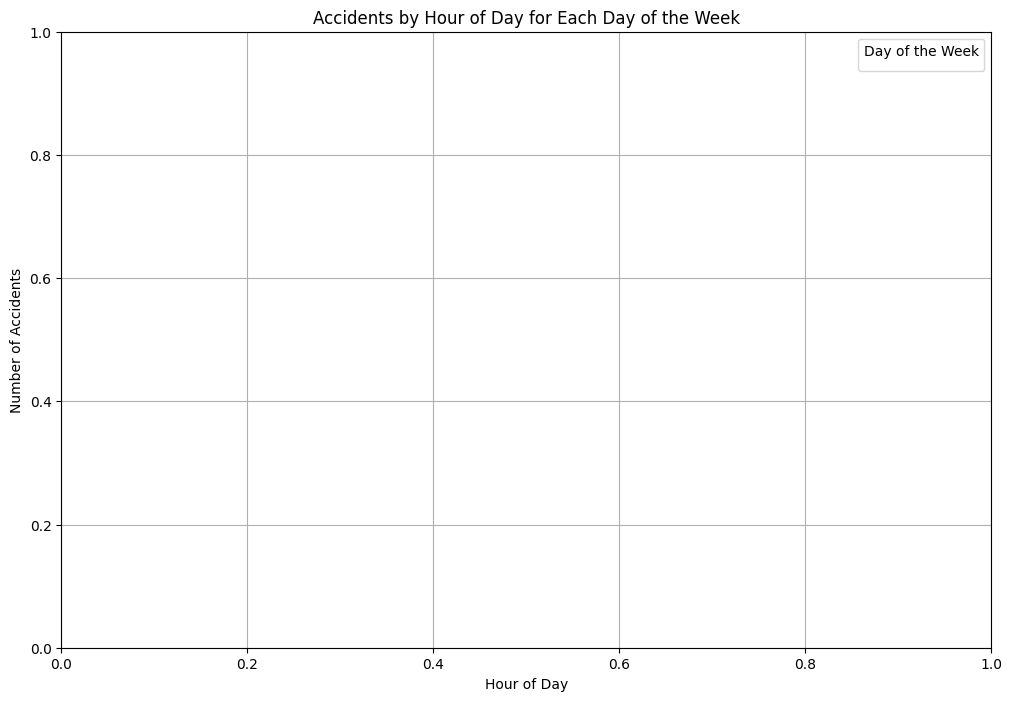

In [54]:
pastel_colors = sns.color_palette("pastel", n_colors=7)
colors = {
    'Monday': pastel_colors[0],
    'Tuesday': pastel_colors[1],
    'Wednesday': pastel_colors[2],
    'Thursday': pastel_colors[3],
    'Friday': pastel_colors[4],
    'Saturday': pastel_colors[5],
    'Sunday': pastel_colors[6]
}

grouped_data = accidents_persona.groupby(['Day_of_Week', 'Hour_of_Day']).size().unstack(fill_value=0)


plt.figure(figsize=(12, 8))

for day in grouped_data.index:
    plt.plot(
        grouped_data.columns, 
        grouped_data.loc[day], 
        marker='o',
        label=day,
        color=colors.get(day, 'black')  
    )

plt.title('Accidents by Hour of Day for Each Day of the Week')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.legend(title='Day of the Week')
plt.grid(True)
plt.show()

In [65]:
heatmap_data = accidents_persona.groupby(['Day_of_Week', 'Hour_of_Day']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Number of Accidents'})
plt.title('Heatmap of Accidents by Hour and Day of the Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of the Week')
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1200x800 with 0 Axes>

In [64]:
area_data = accidents_persona.groupby(['Hour_of_Day', 'Day_of_Week']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
area_data.plot(kind='area', stacked=True, figsize=(12, 8), alpha=0.7)
plt.title('Stacked Area Chart of Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.legend(title='Day of the Week')
plt.show()

ERROR! Session/line number was not unique in database. History logging moved to new session 16


TypeError: no numeric data to plot

<Figure size 1200x800 with 0 Axes>

IndexError: list index out of range

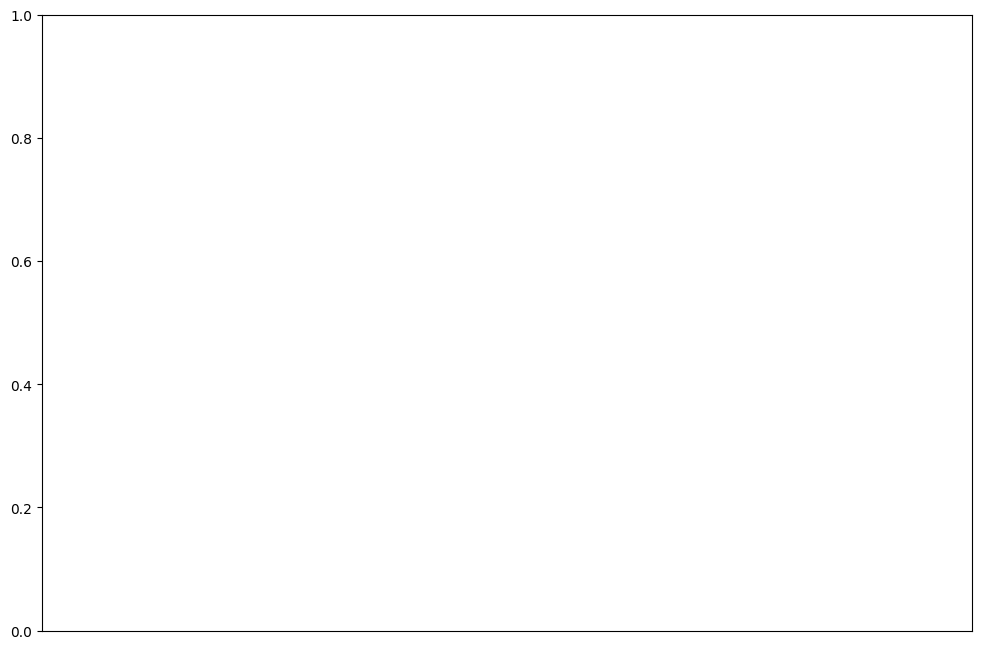

In [80]:
from pandas.plotting import parallel_coordinates

parallel_data = accidents_persona.groupby(['Day_of_Week', 'Hour_of_Day']).size().unstack(fill_value=0)
parallel_data = parallel_data.reset_index()

plt.figure(figsize=(12, 8))
parallel_coordinates(parallel_data, class_column='Day_of_Week', colormap='viridis')
plt.title('Parallel Coordinate Plot of Accidents by Hour and Day of the Week')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.legend(title='Day of the Week')
plt.show()

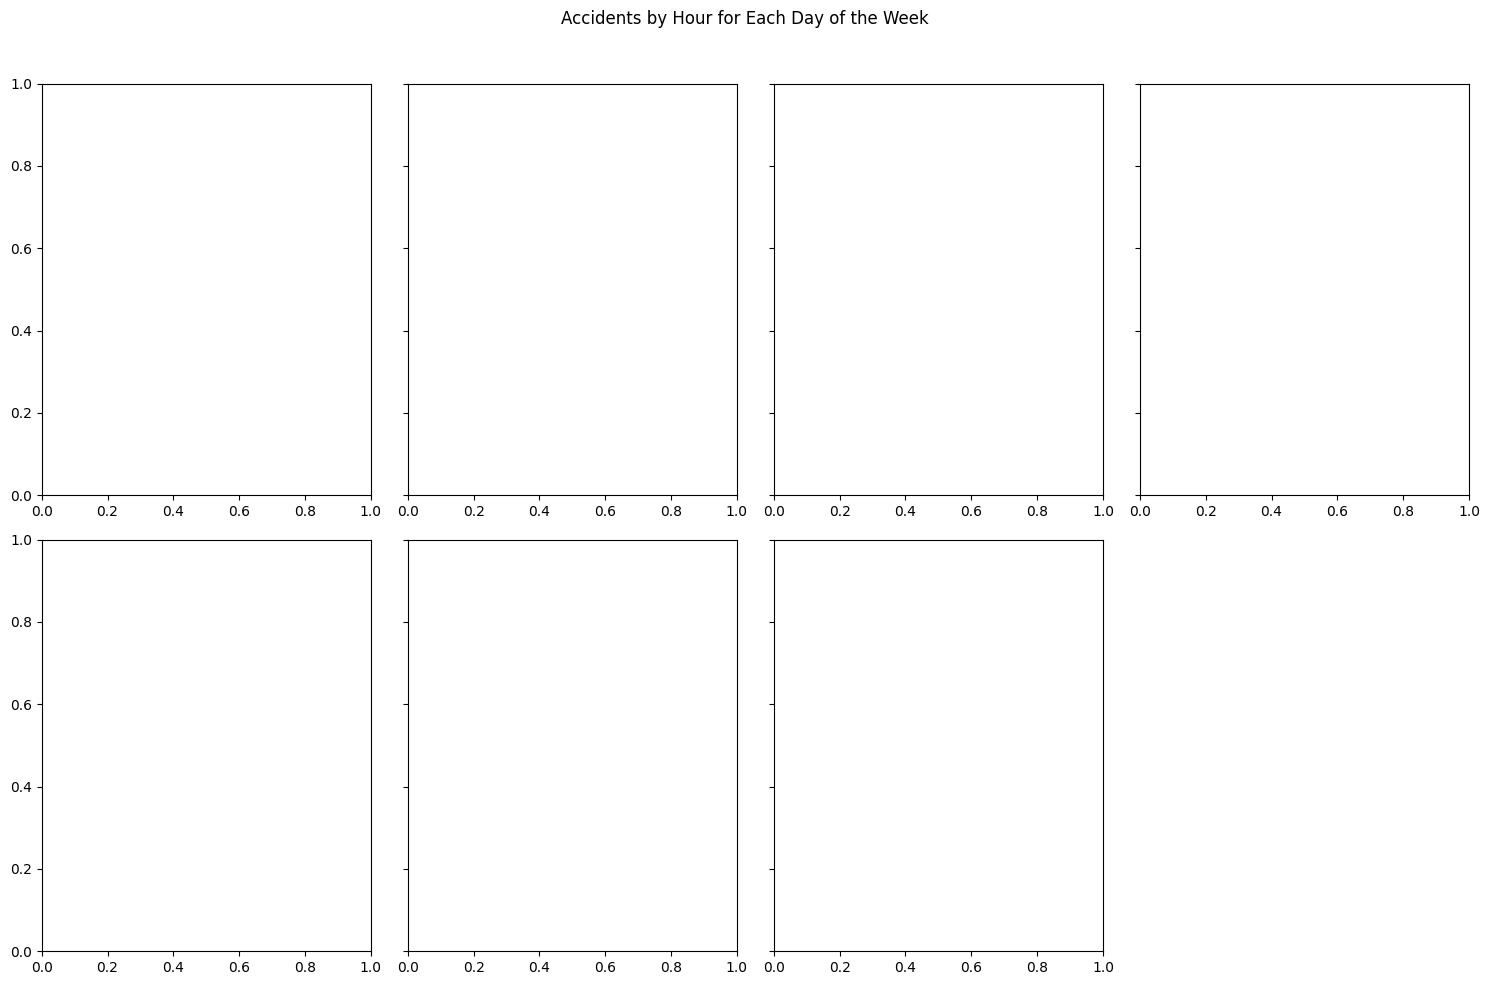

In [82]:
grouped_data = accidents_persona.groupby(['Day_of_Week', 'Hour_of_Day']).size().unstack(fill_value=0)

fig, axes = plt.subplots(2, 4, figsize=(15, 10), sharey=True)
axes = axes.flatten()

for i, day in enumerate(grouped_data.index):
    ax = axes[i]
    ax.plot(grouped_data.columns, grouped_data.loc[day], marker='o')
    ax.set_title(day)
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Number of Accidents')

# Remove empty subplot
fig.delaxes(axes[-1])

plt.suptitle('Accidents by Hour for Each Day of the Week')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
Gender Distribution of Victims

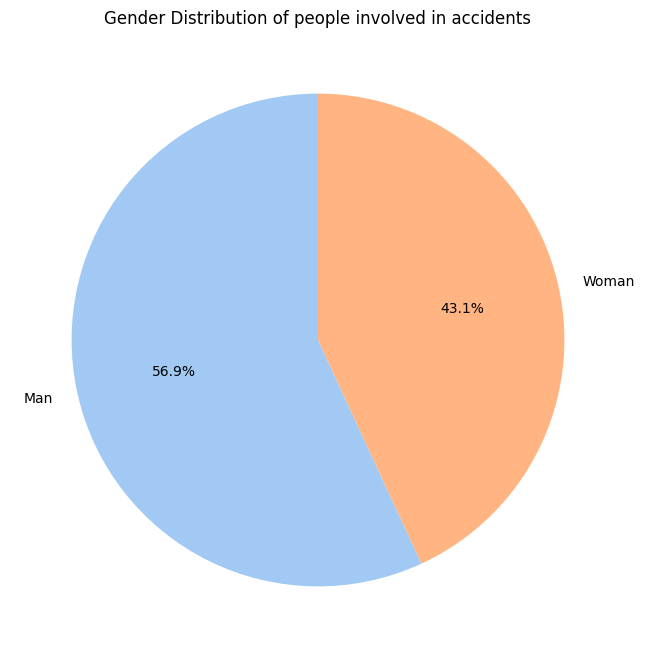

In [59]:
gender_distribution = accidents_persona['Gender_Description'].value_counts()

# Plot the data
gender_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.title('Gender Distribution of people involved in accidents')
plt.ylabel('')
plt.show()

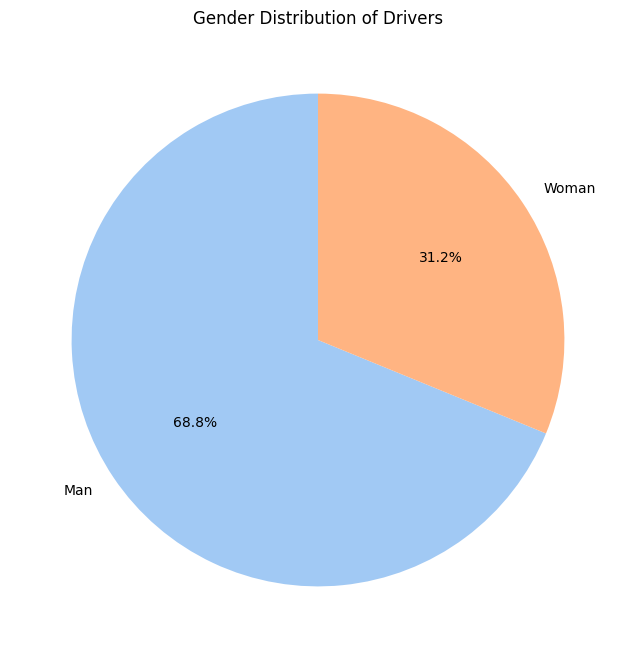

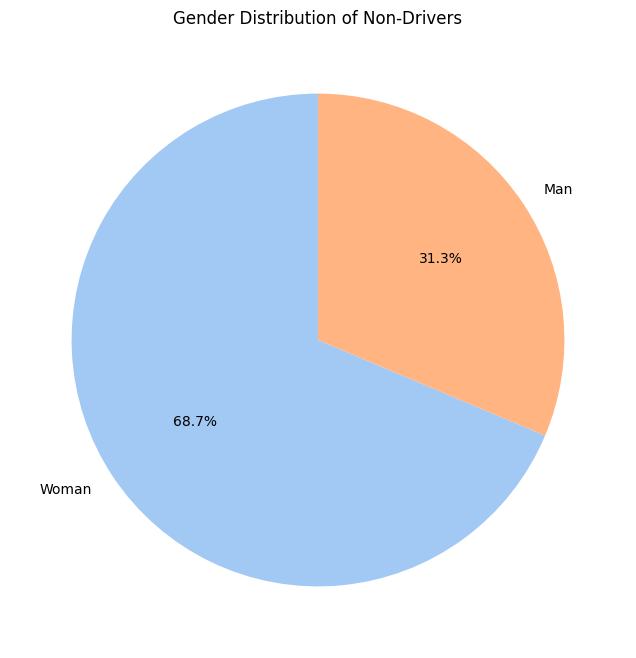

In [41]:
drivers_gender_distribution = accidents_persona[
    accidents_persona['Person_Type_Description'] == 'Driver'
]['Gender_Description'].value_counts()
non_drivers_gender_distribution = accidents_persona[
    accidents_persona['Person_Type_Description'] != 'Driver'
]['Gender_Description'].value_counts()
plt.figure(figsize=(8, 8))
drivers_gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Gender Distribution of Drivers')
plt.ylabel('')
plt.show()

plt.figure(figsize=(8, 8))
non_drivers_gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Gender Distribution of Non-Drivers')
plt.ylabel('')
plt.show()

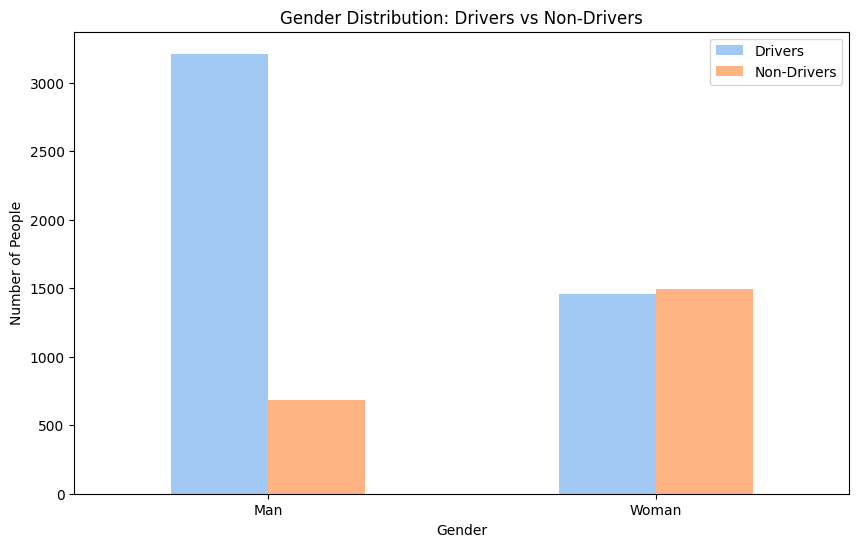

In [83]:
drivers_gender = accidents_persona[accidents_persona['Person_Type_Description'] == 'Driver']['Gender_Description'].value_counts()
non_drivers_gender = accidents_persona[accidents_persona['Person_Type_Description'] != 'Driver']['Gender_Description'].value_counts()

gender_comparison = pd.DataFrame({
    'Drivers': drivers_gender,
    'Non-Drivers': non_drivers_gender
}).fillna(0)

sns.set_palette("pastel")

gender_comparison.plot(kind='bar', figsize=(10, 6))
plt.title('Gender Distribution: Drivers vs Non-Drivers')
plt.xlabel('Gender')
plt.ylabel('Number of People')
plt.xticks(rotation=0)
plt.show()

# Age Distribution of Victims

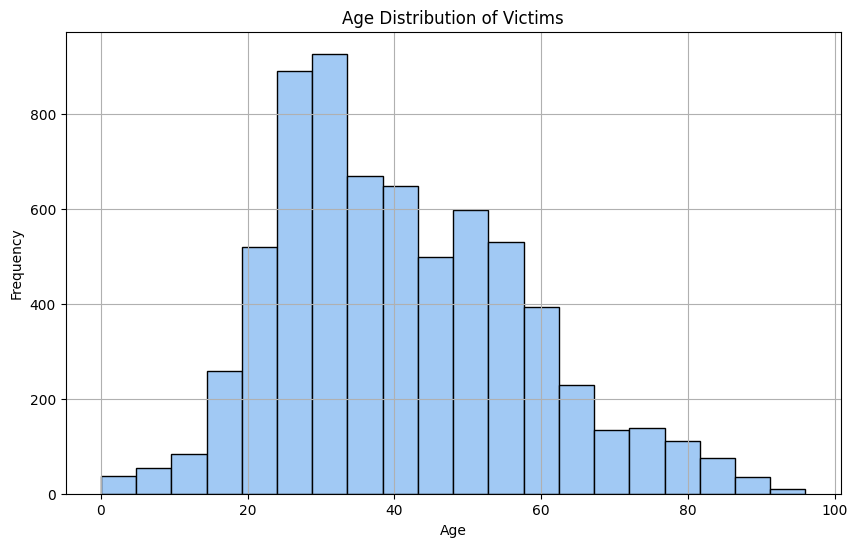

In [43]:
accidents_persona['Age'].plot(kind='hist', bins=20, figsize=(10, 6), edgecolor='black')
sns.set_palette("pastel")

plt.title('Age Distribution of Victims')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

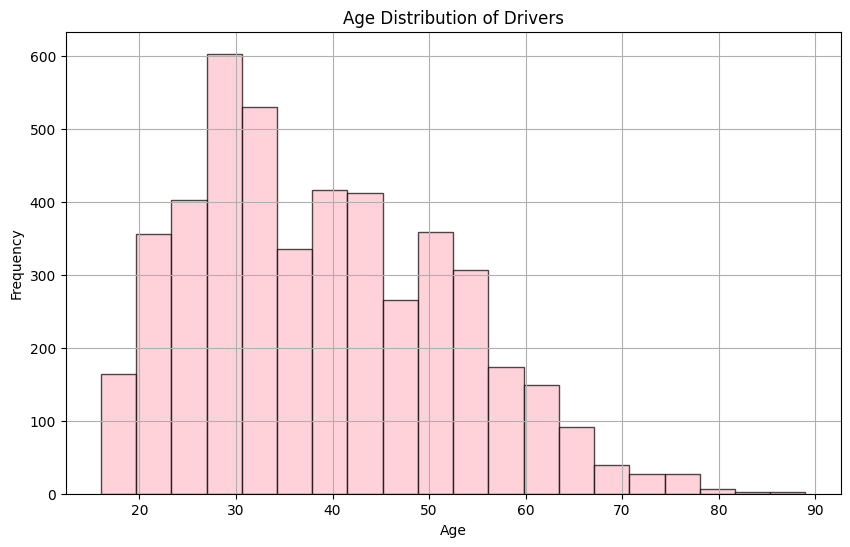

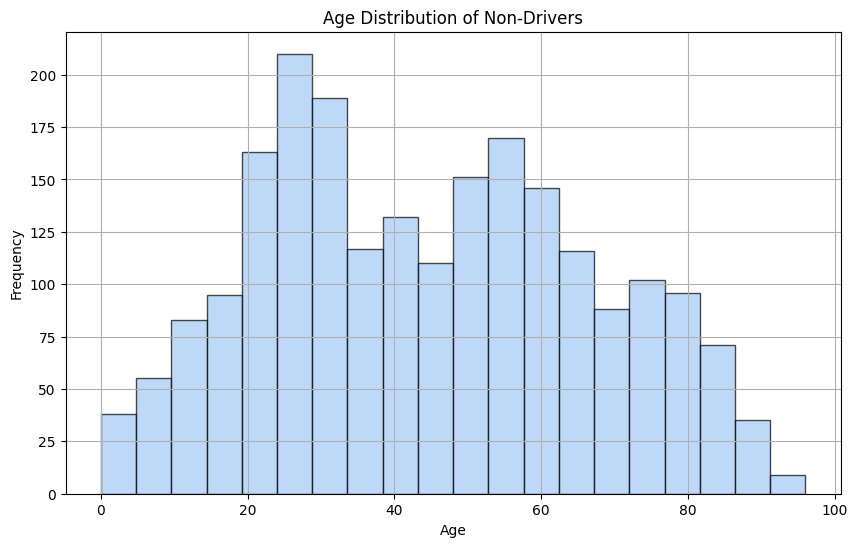

In [44]:
drivers_age = accidents_persona[accidents_persona['Person_Type_Description'] == 'Driver']['Age']

non_drivers_age = accidents_persona[accidents_persona['Person_Type_Description'] != 'Driver']['Age']
sns.set_palette("pastel")

plt.figure(figsize=(10, 6))
drivers_age.plot(kind='hist', bins=20, edgecolor='black', alpha=0.7, color = 'pink')
plt.title('Age Distribution of Drivers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
non_drivers_age.plot(kind='hist', bins=20, edgecolor='black', alpha=0.7)
plt.title('Age Distribution of Non-Drivers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Vehicle involved by day and hour

In [86]:

vehicle_data = accidents_persona.groupby(['Day_of_Week', 'Hour_of_Day', 'Involved_Vehicle_Type']).size().reset_index(name='Count')


heatmap_data = vehicle_data.pivot_table(index='Day_of_Week', columns='Hour_of_Day', values='Count', aggfunc='sum', fill_value=0)
sns.set_palette("pastel")



plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, cbar_kws={'label': 'Number of Involved Vehicles'})
plt.title('Involved Vehicle Types by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1200x800 with 0 Axes>

### Vehicle involved by day 

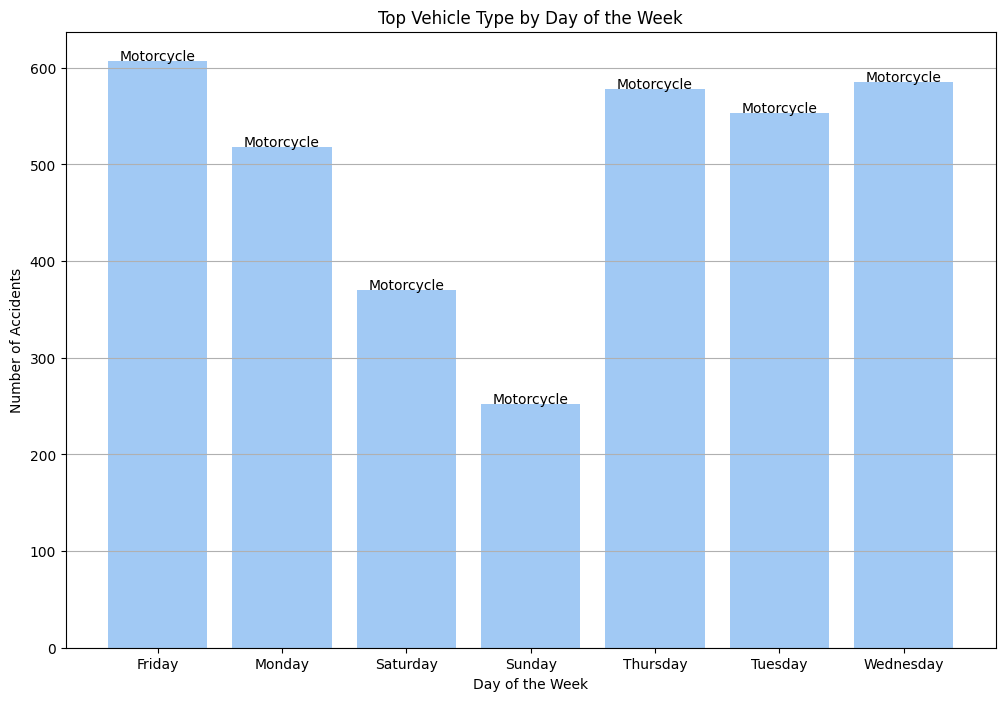

In [46]:

vehicle_data_by_day = accidents_persona.groupby(['Day_of_Week', 'Involved_Vehicle_Type']).size().reset_index(name='Count')

top_vehicle_by_day = vehicle_data_by_day.loc[vehicle_data_by_day.groupby('Day_of_Week')['Count'].idxmax()]
sns.set_palette("pastel")

plt.figure(figsize=(12, 8))
plt.bar(top_vehicle_by_day['Day_of_Week'], top_vehicle_by_day['Count'])
for i, row in top_vehicle_by_day.iterrows():
    plt.text(row['Day_of_Week'], row['Count'] + 1, row['Involved_Vehicle_Type'], ha='center', fontsize=10)
sns.set_palette("pastel")

plt.title('Top Vehicle Type by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.grid(axis='y')
plt.show()

### Vehicle involved by hour

In [87]:


vehicle_data_by_hour = accidents_persona.groupby(['Hour_of_Day', 'Involved_Vehicle_Type']).size().reset_index(name='Count')
top_vehicle_by_hour = vehicle_data_by_hour.loc[vehicle_data_by_hour.groupby('Hour_of_Day')['Count'].idxmax()]
print(top_vehicle_by_hour)

if not top_vehicle_by_hour.empty:
    plt.figure(figsize=(14, 8))
    plt.bar(top_vehicle_by_hour['Hour_of_Day'], top_vehicle_by_hour['Count'], color='lightcoral', edgecolor='black')
    for _, row in top_vehicle_by_hour.iterrows():
        plt.text(
            row['Hour_of_Day'], 
            row['Count'] + 1, 
            row['Involved_Vehicle_Type'], 
            ha='center', 
            fontsize=10
        )

 
    plt.title('Top Vehicle Type by Hour of the Day', fontsize=16)
    plt.xlabel('Hour of Day', fontsize=12)
    plt.ylabel('Number of Accidents', fontsize=12)
    plt.xticks(range(0, 24), rotation=45, fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("No data to display!")



Empty DataFrame
Columns: [Hour_of_Day, Involved_Vehicle_Type, Count]
Index: []
No data to display!


# Pedestrian cause top 5

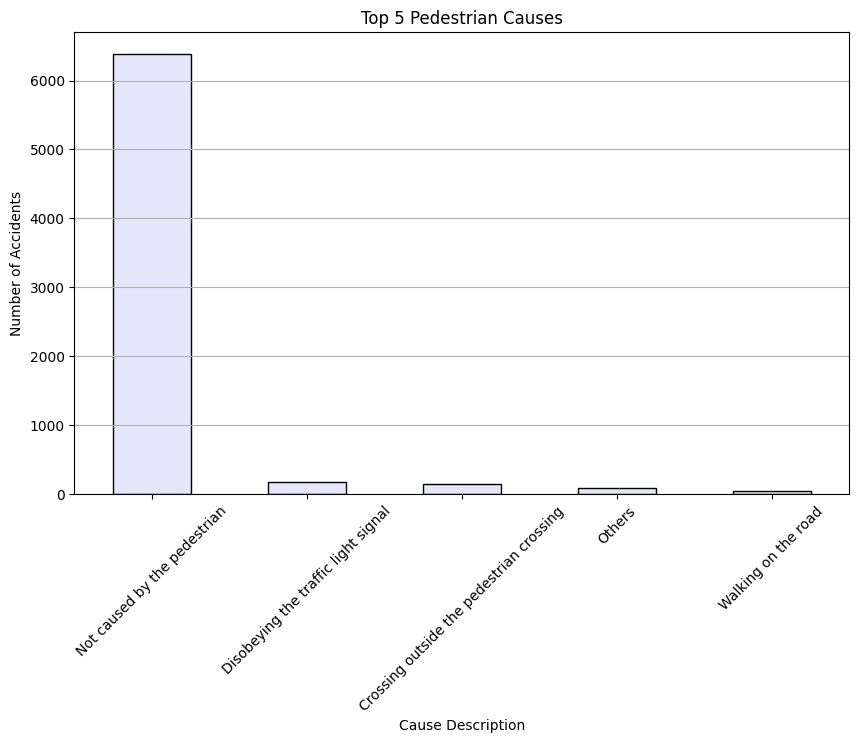

In [48]:
top_5_pedestrian_causes = accidents_persona['Pedestrian_Cause_Description'].value_counts().head(5)

# Plot the top 5 pedestrian causes
plt.figure(figsize=(10, 6))
top_5_pedestrian_causes.plot(kind='bar', color='lavender', edgecolor='black')
plt.title('Top 5 Pedestrian Causes')
plt.xlabel('Cause Description')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()